In [1]:
%matplotlib inline
import os
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import keras
from keras.utils import Sequence
from tqdm import tqdm

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from urllib.request import urlopen
from PIL import Image

Using TensorFlow backend.


In [21]:
dataType='train2017'
annFile='/home/matsvei.rozanau/hdd/datasets/coco_dataset/annotations/instances_{}.json'.format(dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=12.82s)
creating index...
index created!


(375, 500)


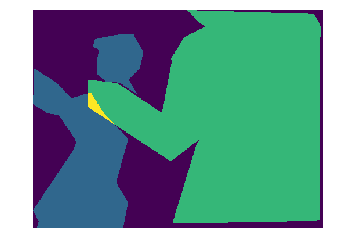

In [45]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

I = Image.open(urlopen(img['coco_url']))#io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
# coco.showAnns(anns)

mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)
print(mask.shape)

In [35]:
imgs = coco.loadImgs(imgIds)
imgs_ids = [i['id'] for i in imgs]
annIds = coco.getAnnIds(imgIds=imgs_ids, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [115]:
img = load_img('/home/matsvei.rozanau/hdd/datasets/coco_dataset/train2017/' + img['file_name']) 

In [67]:
class COCODataLoader(Sequence):
    def __init__(self, batch_size, path_to_annotations, path_to_images):
        self.dataset = COCO(path_to_annotations)
        self.path_to_images = path_to_images
        self.batch_size = batch_size
        self.categories_ids = self.dataset.getCatIds(catNms=['person']);
        self.images_ids = self.dataset.getImgIds(catIds=self.categories_ids);
        self.images_descriptions = np.asanyarray(self.dataset.loadImgs(self.images_ids))
    
    
    def __len__(self):
        return int(np.ceil(len(self.images_ids) / float(self.batch_size)))
    
    def __getitem__(self, index):
        images = []
        masks = []
        batch_descriptions = self.images_descriptions[index*self.batch_size : (index+1)*self.batch_size]
        for desc in batch_descriptions:
            # Load image
            image_filename = os.path.join(self.path_to_images, desc['file_name'])
            images.append(Image.open(image_filename))
            
            # Load masks for this image
            batch_annotations_ids = self.dataset.getAnnIds(imgIds=desc['id'], catIds=self.categories_ids, iscrowd=None)
            annotations = self.dataset.loadAnns(batch_annotations_ids)
            mask = self.dataset.annToMask(annotations[0])
            for i in range(len(annotations)):
                mask += self.dataset.annToMask(annotations[i])
            masks.append(mask)
            
        return images, masks

In [68]:
d = COCODataLoader(batch_size=3, 
                   path_to_annotations='/home/matsvei.rozanau/hdd/datasets/coco_dataset/annotations/instances_train2017.json',
                   path_to_images='/home/matsvei.rozanau/hdd/datasets/coco_dataset/train2017/')

loading annotations into memory...
Done (t=14.07s)
creating index...
index created!


In [73]:
images, masks = d[241]

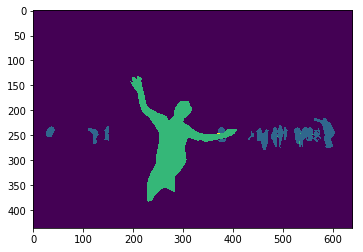

In [76]:
plt.imshow(masks[0])

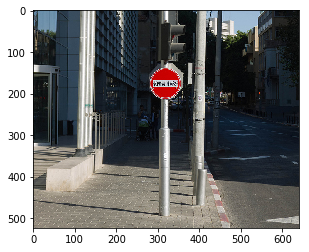

In [77]:
plt.imshow(images[1])

In [72]:
len(d)

21372